In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
amazon=pd.read_csv('ratings_Electronics.csv',header=None)

# 1. Read and explore the given dataset. ( Rename column/add headers, plot histograms,find data characteristics)

In [4]:
amazon.shape

(7824482, 4)

In [5]:
amazon.head()

,0,1,2,3
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [6]:
amazon.columns=['userId','productId','ratings','timestamp']

In [7]:
# renamed the columns

In [8]:
amazon.head()

,userId,productId,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [9]:
amazon=amazon.drop('timestamp',axis=1)
# dropping timestamp column

In [10]:
amazon.isnull().any()
# checking missing values- No missing values

userId       False
productId    False
ratings      False
dtype: bool

In [11]:
amazon.describe()

,ratings
count,7.824482e+06
mean,4.012337e+00
std,1.380910e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [12]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
userId       object
productId    object
ratings      float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

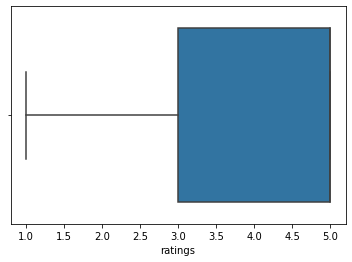

In [14]:
sns.boxplot(amazon['ratings'])

In [15]:
# Number of unique users and products
print("Number of unique Users:",amazon.userId.nunique())
print("Number of unique Products:",amazon.productId.nunique())

Number of unique Users: 4201696
Number of unique Products: 476002


In [16]:
# minimum and maximum ratings given
print("The Minimum rating is:",amazon.ratings.min())
print("The Maximum rating is:",amazon.ratings.max())

The Minimum rating is: 1.0
The Maximum rating is: 5.0


In [17]:
# Number of observations in each ratings
amazon.ratings.value_counts()

5.0    4347541
4.0    1485781
1.0     901765
3.0     633073
2.0     456322
Name: ratings, dtype: int64

D:\Python\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


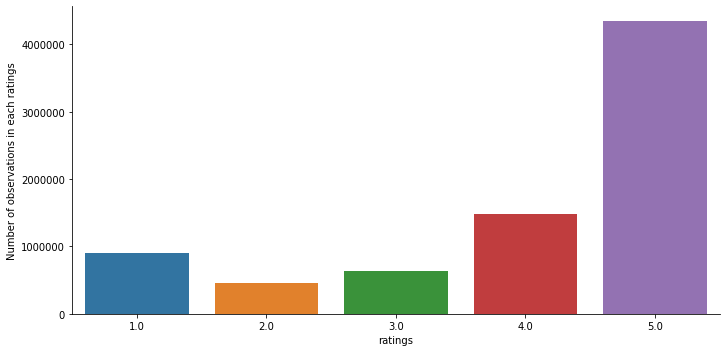

In [18]:
g = sns.factorplot("ratings", data=amazon, aspect=2.0, kind='count')
g.set_ylabels("Number of observations in each ratings")

In [19]:
#Different unique products under each ratings
amazon.groupby('ratings')['productId'].nunique()

ratings
1.0    176283
2.0    123419
3.0    152827
4.0    223845
5.0    358458
Name: productId, dtype: int64

In [20]:
#Different unique users under each ratings
amazon.groupby('ratings')['userId'].nunique()

ratings
1.0     784562
2.0     406277
3.0     529665
4.0    1089450
5.0    2597345
Name: userId, dtype: int64

# 2. Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings )

In [21]:
most_rated = amazon.userId.value_counts()

In [22]:
amazon.userId.value_counts() # users with their respective number of ratings

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
ARBKYIVNYWK3C     296
A25C2M3QF9G7OQ    296
A22CW0ZHY3NJH8    292
A38RMU1Y5TDP9     282
A3EXWV8FNSSFL6    282
A3LGT6UZL99IW1    279
A2NOW4U7W3F7RI    277
A23GFTVIETX7DS    270
A3PD8JD9L4WEII    266
A17BUUBOU0598B    261
A3AYSYSLHU26U9    257
A2XRMQA6PJ5ZJ8    253
A12DQZKRKTNF5E    252
A231WM2Z2JL0U3    252
A1UQBFCERIP7VJ    247
AGVWTYW0ULXHT     244
A203OCQQ12MAVT    240
AEJAGHLC675A7     239
A2NYK9KWFMJV4Y    238
A3A4ZAIBQWKOZS    236
A1T1YSCDW0PD25    227
                 ... 
ACEDTQ3M165FD       1
A2DZD29R0ZKXOM      1
A868EXFZVJU9G       1
ATKQU0LRD5Y33       1
A2WWLO2H2WI9BT      1
A3T25OFV9HCPVI      1
A2WXT5NNESWZQT      1
AZ7ID4GQEHOP        1
A2NWTIW5PKCUG9      1
A2XHKKKBGWKY4L      1
AJPW9ZW45JBJC       1
A30MNQQPW8OUFD      1
A1MZYL82TDD38H      1
ABL2707JL1UO0       1
A3MG9U92IH

In [23]:
# Storing the above information 
top_fifty = amazon.userId.value_counts().rename_axis('UserId').reset_index(name='No. of ratings')

In [24]:
top_fifty.head()

,UserId,No. of ratings
0,A5JLAU2ARJ0BO,520
1,ADLVFFE4VBT8,501
2,A3OXHLG6DIBRW8,498
3,A6FIAB28IS79,431
4,A680RUE1FDO8B,406


In [25]:
# Dropping the users who have rated less than 50 products.
amazon_df = amazon[amazon.userId.isin(top_fifty[top_fifty['No. of ratings'] >= 50].UserId)]

In [26]:
# number of unique users now who have atleast rated 50 products
amazon_df.userId.nunique()

1540

In [27]:
# number of unique products now
amazon_df.productId.nunique()

48190

# 3. Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
train_set,test_set = train_test_split(amazon_df, test_size=0.3, random_state=9999)

In [30]:
train_set.head()

,userId,productId,ratings
876820,A1LA4K5JF78BER,B000EPRG6W,5.0
7812456,A3LDPF5FMB782Z,B00JJ34TEW,1.0
1040483,A213J54E63SYOP,B000I97N4O,4.0
114466,A231WM2Z2JL0U3,B00005Q7DG,4.0
3418887,A54SG05AV6S4H,B003LL1EM8,5.0


In [31]:
test_set.head()

,userId,productId,ratings
2756026,A2MOD50IHEDH3G,B002OOWCA6,5.0
5522433,A15J71JLC29KPW,B006ZBWV0K,4.0
5994693,A25C2M3QF9G7OQ,B007ZZ6OW6,4.0
5023517,A6FIAB28IS79,B005JACJ50,5.0
4693787,A25C2M3QF9G7OQ,B0054L8N7M,5.0


In [32]:
train_set.shape

(88109, 3)

In [33]:
test_set.shape

(37762, 3)

# 4. Build Popularity Recommender model.

In [34]:
class popularity_recommender_py():
    def __init__(self):
        self.train_set = None
        self.user_Id = None
        self.product_Id = None
        self.popularity_recommendations = None
        
    #Create the popularity based recommender system model
    def create(self, train_set, user_Id, product_Id):
        self.train_set = train_set
        self.user_Id = user_Id
        self.product_Id = product_Id

       
        train_data_grouped = train_set.groupby([self.product_Id]).agg({self.user_Id: 'count'}).reset_index()
        train_data_grouped.rename(columns = {'userId': 'score'},inplace=True)
    
        
        train_data_sort = train_data_grouped.sort_values(['score', self.product_Id], ascending = [0,1])
    
        #Generate a recommendation rank based upon score
        train_data_sort['rank'] = train_data_sort['score'].rank(ascending=0, method='first')
        
        #Get the top 10 recommendations
        self.popularity_recommendations = train_data_sort.head(10)

    #Use the popularity based recommender system model to
    #make recommendations
    def recommend(self, user_id):    
        user_recommendations = self.popularity_recommendations
        
        #Add user_id column for which the recommendations are being generated
        user_recommendations['userId'] = user_id
    
        #Bring user_id column to the front
        cols = user_recommendations.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        user_recommendations = user_recommendations[cols]
        
        return user_recommendations

In [35]:
popularity_model=popularity_recommender_py()

In [36]:
popularity_model.create(train_set,'userId','productId')

In [37]:
train_users = train_set['userId'].unique()

In [38]:
train_users

array(['A1LA4K5JF78BER', 'A3LDPF5FMB782Z', 'A213J54E63SYOP', ...,
       'ANEXFROORI6F6', 'A22NKFOH9RATRC', 'AT2J7H5TRZM8Z'], dtype=object)

In [39]:
train_users[7]

'A11ULAZ4B5ZXC8'

In [40]:
popularity_model.recommend(train_users[7]).head(10) # recommending for user at index value 8

,userId,productId,score,rank
30912,A11ULAZ4B5ZXC8,B0088CJT4U,140,1.0
19612,A11ULAZ4B5ZXC8,B003ES5ZUU,125,2.0
8674,A11ULAZ4B5ZXC8,B000N99BBC,121,3.0
30614,A11ULAZ4B5ZXC8,B00829TIEK,118,4.0
30326,A11ULAZ4B5ZXC8,B007WTAJTO,112,5.0
31174,A11ULAZ4B5ZXC8,B008DWCRQW,104,6.0
30610,A11ULAZ4B5ZXC8,B00829THK0,102,7.0
17298,A11ULAZ4B5ZXC8,B002R5AM7C,91,8.0
17483,A11ULAZ4B5ZXC8,B002SZEOLG,84,9.0
22782,A11ULAZ4B5ZXC8,B004CLYEDC,80,10.0


# 5. Build Collaborative Filtering model.

In [41]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split
import random

In [42]:
#load the dataset as per the requirement for surprise module
reader = Reader(rating_scale = (1,5))
data = Dataset.load_from_df(amazon_df, reader = reader)

In [43]:
#spliting the train and test with surprise model functionality
trainset, testset = train_test_split(data, test_size=.3)

In [44]:
#  KNN algorithm
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})

# Train the model with train dataset
algo.fit(data.build_full_trainset())

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [45]:
# Evalute on test set
test_pred = algo.test(testset)

In [46]:
# View a particular prediction
test_pred[12]

# To access a particular value, say estimate simply mention test_pred[12].est

Prediction(uid='AZ8XSDMIX04VJ', iid='B00064V6RG', r_ui=5.0, est=5, details={'actual_k': 4, 'was_impossible': False})

In [47]:
# converting results to dataframe
test_pred_df = pd.DataFrame(test_pred)

In [48]:
test_pred_df.head()

,uid,iid,r_ui,est,details
0,A2EHYCA29NSQLU,B0044QMAFY,1.0,1.000000,"{'actual_k': 1, 'was_impossible': False}"
1,A3A4ZAIBQWKOZS,B00FC2R7ZC,5.0,4.979574,"{'actual_k': 8, 'was_impossible': False}"
2,A18S2VGUH9SCV5,B004CR7TE2,4.0,4.021416,"{'actual_k': 4, 'was_impossible': False}"
3,A3OXHLG6DIBRW8,B00FNPD1VW,5.0,5.000000,"{'actual_k': 5, 'was_impossible': False}"
4,A1XE3M22N91451,B00FSB7432,4.0,4.000000,"{'actual_k': 1, 'was_impossible': False}"


In [49]:
# Making prediction for a single user
algo.predict(uid="A2KZOIOFXXMC1H",iid="B002C1B9IC")

Prediction(uid='A2KZOIOFXXMC1H', iid='B002C1B9IC', r_ui=None, est=4.0, details={'actual_k': 1, 'was_impossible': False})

# 6. Evaluate both the models. ( Once the model is trained on the training data, it can be used to compute the error (like RMSE) on predictions made on the test data.) You can also use a different method to evaluate the models.

In [50]:
# Evaluation for Popularity Model.

In [51]:
train_set.head(3)

,userId,productId,ratings
876820,A1LA4K5JF78BER,B000EPRG6W,5.0
7812456,A3LDPF5FMB782Z,B00JJ34TEW,1.0
1040483,A213J54E63SYOP,B000I97N4O,4.0


In [52]:
train_rated=train_set.groupby(by='productId')['ratings'].mean().sort_values(ascending=False)

In [53]:
test_rated=test_set.groupby(by='productId')['ratings'].mean().sort_values(ascending=False)

In [54]:
train_rated=train_rated.reset_index(name = 'rating_train')

In [55]:
test_rated=test_rated.reset_index(name = 'rating_test')

In [56]:
rated_products = pd.merge(test_rated, train_rated, on='productId', how='inner')

In [57]:
rated_products.head(10)

,productId,rating_test,rating_train
0,B00LI4ZZO8,5.0,4.0
1,B002RWKFFE,5.0,5.0
2,B002RWJGHC,5.0,5.0
3,B002RWJDB6,5.0,4.0
4,B002RWJD98,5.0,4.0
5,B002ROILDA,5.0,5.0
6,B002RL9XRG,5.0,5.0
7,B002R84J28,5.0,5.0
8,B002R5ABIW,5.0,5.0
9,B002R0DZZ8,5.0,4.0


In [58]:
amazon_df.productId.sample()

3891741    B0045JLPN8
Name: productId, dtype: object

In [59]:
test_rated[test_rated["productId"] == "B0045JLPN8"]

,productId,rating_test
16129,B0045JLPN8,4.0


In [60]:
train_rated[train_rated["productId"] == "B0045JLPN8"]

,productId,rating_train
36535,B0045JLPN8,2.0


In [61]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [62]:
print("RMSE value",np.sqrt(mean_squared_error(rated_products["rating_train"],rated_products["rating_test"])))

RMSE value 1.1143395544811225


In [63]:
# Evaluation for Collaborative Filtering Model.
print ("Collaborative Model RMSE: ", accuracy.rmse(test_pred))

RMSE: 0.0336
Collaborative Model RMSE:  0.033581420633871414


# 7. Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.

In [64]:
# Top 5 recommendation using Popularity Model

In [65]:
Users = amazon_df['userId'].unique()

In [66]:
Users[7]

'A25RTRAPQAJBDJ'

In [68]:
popularity_model.recommend(Users[7]).head(5)  # recommendations for userID 'A25RTRAPQAJBDJ'

,userId,productId,score,rank
30912,A25RTRAPQAJBDJ,B0088CJT4U,140,1.0
19612,A25RTRAPQAJBDJ,B003ES5ZUU,125,2.0
8674,A25RTRAPQAJBDJ,B000N99BBC,121,3.0
30614,A25RTRAPQAJBDJ,B00829TIEK,118,4.0
30326,A25RTRAPQAJBDJ,B007WTAJTO,112,5.0


In [69]:
Users[251]

'A3V6Z4RCDGRC44'

In [70]:
popularity_model.recommend(Users[251]).head(5)  # recommendations for userID 'A3V6Z4RCDGRC44'

,userId,productId,score,rank
30912,A3V6Z4RCDGRC44,B0088CJT4U,140,1.0
19612,A3V6Z4RCDGRC44,B003ES5ZUU,125,2.0
8674,A3V6Z4RCDGRC44,B000N99BBC,121,3.0
30614,A3V6Z4RCDGRC44,B00829TIEK,118,4.0
30326,A3V6Z4RCDGRC44,B007WTAJTO,112,5.0


In [71]:
# Similar predictions for different users based on popularity ie that's why it is termed popularity recommendation system

In [72]:
# Top 5 recommendation using Collaborative Filtering Model

In [73]:
new_testset = trainset.build_anti_testset() # Building testset using trainset

In [74]:
len(new_testset)

58858471

In [75]:
new_testset[0:5]

[('ACQYIC13JXAOI', 'B005TDWVTQ', 4.264422476704991),
 ('ACQYIC13JXAOI', 'B00HF35QW2', 4.264422476704991),
 ('ACQYIC13JXAOI', 'B00BWF5U0M', 4.264422476704991),
 ('ACQYIC13JXAOI', 'B000RPXE74', 4.264422476704991),
 ('ACQYIC13JXAOI', 'B00065W74Q', 4.264422476704991)]

In [76]:
predictions_colab = algo.test(new_testset[0:10000])

In [77]:
predictions_colab_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in predictions_colab])

In [78]:
predictions_colab_df.columns = ["userId","productId","est_rating"]
predictions_colab_df.sort_values(by = ["userId", "est_rating"],ascending=False,inplace=True)

In [79]:
predictions_colab_df.head()

,userId,productId,est_rating
35,ACQYIC13JXAOI,B00HFW1E1A,5.0
39,ACQYIC13JXAOI,B00029U1DK,5.0
40,ACQYIC13JXAOI,B000SXWGA6,5.0
47,ACQYIC13JXAOI,B001EAQTRI,5.0
59,ACQYIC13JXAOI,B004TJ6JH6,5.0


In [80]:
top_5_recommendations = predictions_colab_df.groupby("userId").head(5).reset_index(drop=True)

In [81]:
print('# Top 5 recommendation using Collaborative Filtering Model',"\n",top_5_recommendations)

# Top 5 recommendation using Collaborative Filtering Model 
           userId   productId  est_rating
0  ACQYIC13JXAOI  B00HFW1E1A         5.0
1  ACQYIC13JXAOI  B00029U1DK         5.0
2  ACQYIC13JXAOI  B000SXWGA6         5.0
3  ACQYIC13JXAOI  B001EAQTRI         5.0
4  ACQYIC13JXAOI  B004TJ6JH6         5.0


# 8. Summarise your insights.

# POPULARITY RECOMMENDATION SYSTEM
The Popularity-based recommender system is non-personalised and the recommendations are based on frequecy counts, which may be not suitable to the user.
It is evident that the same set of recommendation for all the users as this model is not user specific.
This model gives recommendations based on popularity of the item

# COLLABORATIVE FILTERING RECOMMENDATION SYSTEM
Model-based Collaborative Filtering is a personalised recommender system, the recommendations are based on the past behavior of the user and it is not dependent on any additional information.
Differnt recommendations are given for different users, as Collaborative Filtering model is based on user preferrences unlike Popularity Model.

# RMSE EVALUATION
Collaborative model have given the better accuracy (less error, RMSE) than Popularity Model.
As Collaborative model is based on user/item charecteristics, it will be more accurate than Popularity Model.

# CONCLUSION
The differance is evident above for the user id A25RTRAPQAJBDJ, A3V6Z4RCDGRC44, The Popularity based model has recommended the same set of 5 products to both
So Collaborative Filtering model will give precise recommendation than Popularity Model. 
It was evident with the RMSE scores of each models.